In [13]:
import models.shallow_NN as shallow_NN
import os
import torch
import matplotlib.pyplot as plt
from main_utils import get_dataset

In [21]:
def get_out_weights(results_path, model_path, input_dim, channels, output_dim, num_hidden, thresh=0.0001):
    net = shallow_NN(input_dim, channels, num_hidden, output_dim)
    
    best_model = torch.load(model_path)
    best_results = torch.load(results_path)
    
    net.load_state_dict(best_model['model_state_dict'])
    net_out_weights = net.linear2.weight.detach()
    
    pns=best_results['act']['pns']
    final_pns = pns[-2][0]
    max_pn = torch.max(final_pns, dim=0)[0]
    act_neurons = final_pns > thresh*max_pn
    
    return net_out_weights.T[act_neurons]

In [9]:
def plot_nacts(results_path, title):
    results = torch.load(results_path)
    nacts = results['act']['nact']
    nacts = [nact[0].cpu() for nact in nacts]
    plt.plot(nacts[:-1])
    plt.title(title)
    return nacts

In [10]:
def plot_out_sparsity(results_path, title):
    results = torch.load(results_path)
    out_sparse = results['act']['out_sparse']
    print(out_sparse.shape)
    out_sparse = [out_spas.cpu() for out_spas in out_sparse]
    plt.plot(out_sparse[:-1])
    return out_sparse

## Binary MNIST Experiments
In these experiments we trained a shallow neural network with 250 hidden neurons to classify just 0s and 1s from the MNIST dataset using one -hot encoding and MSE loss. We trained on an even dataset of 100 total samples.

In [5]:
w2v1_binary_results_PATH = 'results/MNIST_binary_shallow_NN/0701191815_pn_w2v1_loss_{0.0004}_{0.1}_balance/result.pt'
w2v1_binary_model_PATH = 'results/MNIST_binary_shallow_NN/0701191815_pn_w2v1_loss_{0.0004}_{0.1}_balance/model_idx_8000_acc_0_14_sp_43.pt'

w2v2_binary_results_PATH = 'results/MNIST_binary_shallow_NN/0701113100_pn_w2v2_loss_{0.0004}_{0.1}_balance/result.pt'
w2v2_binary_model_PATH = 'results/MNIST_binary_shallow_NN/0701113100_pn_w2v2_loss_{0.0004}_{0.1}_balance/model_idx_10000_acc_99_86_sp_46.pt'

In [6]:
w2v1_binary_out_weights = get_out_weights(w2v1_binary_results_PATH, w2v1_binary_model_PATH, 28, 1, 2, 250)
#w2v1_binary_out_weights[w2v1_binary_out_weights < 1e-4] = 0
print('Total Active Neurons: {}'.format(len(w2v1_binary_out_weights)))
for weight in w2v1_binary_out_weights:
    print(weight, '\n')

Total Active Neurons: 35
tensor([-0.2331, -0.1405]) 

tensor([-0.0500,  0.0000]) 

tensor([-2.6938e-05,  6.1022e-03]) 

tensor([-0.3371, -0.1106]) 

tensor([-0.0086,  0.0530]) 

tensor([-0.0430,  0.0000]) 

tensor([-0.0958,  0.0000]) 

tensor([-2.3311e-04,  9.6726e-05]) 

tensor([-0.1359,  0.0000]) 

tensor([-0.0008,  0.0153]) 

tensor([-0.3658, -0.1386]) 

tensor([-0.1594,  0.0000]) 

tensor([-0.0808,  0.0000]) 

tensor([-0.4914, -0.2330]) 

tensor([-0.6711, -0.2808]) 

tensor([-0.0057,  0.0392]) 

tensor([-0.0493,  0.0000]) 

tensor([-0.4632, -0.1896]) 

tensor([-0.1202, -0.0041]) 

tensor([-0.0121,  0.0790]) 

tensor([ 0.0000, -0.0312]) 

tensor([-0.1231,  0.0000]) 

tensor([-0.3999, -0.1436]) 

tensor([-0.2264,  0.0000]) 

tensor([-0., 0.]) 

tensor([-0.4162, -0.1109]) 

tensor([-0.2225, -0.1509]) 

tensor([-0.0059,  0.0434]) 

tensor([ 0.1868, -0.0996]) 

tensor([-0.0057,  0.0349]) 

tensor([-0.3646, -0.0792]) 

tensor([-0.1140, -0.0182]) 

tensor([-0.1073,  0.0000]) 

tensor([-0.

In [7]:
w2v2_binary_out_weights = get_out_weights(w2v2_binary_results_PATH, w2v2_binary_model_PATH, 28, 1, 2, 250)
#w2v1_binary_out_weights[w2v1_binary_out_weights < 1e-4] = 0
print('Total Active Neurons: {}'.format(len(w2v2_binary_out_weights)))
for weight in w2v2_binary_out_weights:
    print(weight, '\n')

Total Active Neurons: 63
tensor([-1.2329, -0.3977]) 

tensor([-0.9168, -0.3683]) 

tensor([-0.2748, -0.0953]) 

tensor([-0.4169, -0.1845]) 

tensor([-0.4645, -0.1855]) 

tensor([-1.4623, -0.5821]) 

tensor([-0.9104, -0.3392]) 

tensor([-0.0569, -0.0281]) 

tensor([-0.0174, -0.0098]) 

tensor([-0.0467, -0.0158]) 

tensor([-0.4573, -0.1739]) 

tensor([-0.5498, -0.2070]) 

tensor([-0.2399, -0.0954]) 

tensor([0.2491, 0.0779]) 

tensor([-1.1726, -0.4868]) 

tensor([-0.0873, -0.0399]) 

tensor([-0.7718, -0.2836]) 

tensor([-0.1892, -0.0687]) 

tensor([-0.1061, -0.0405]) 

tensor([-0.1461, -0.0563]) 

tensor([-0.1652, -0.0445]) 

tensor([-0.0002,  0.0004]) 

tensor([-0.1429, -0.0616]) 

tensor([-0.0862, -0.0382]) 

tensor([ 0.1408, -0.0619]) 

tensor([-0.7033, -0.2481]) 

tensor([-0.9384, -0.2680]) 

tensor([0.2575, 0.1257]) 

tensor([-0.1567, -0.0658]) 

tensor([0.3204, 0.1372]) 

tensor([-0.5017, -0.1989]) 

tensor([-0.1219, -0.0621]) 

tensor([-0.5425, -0.2079]) 

tensor([-1.1039, -0.4193

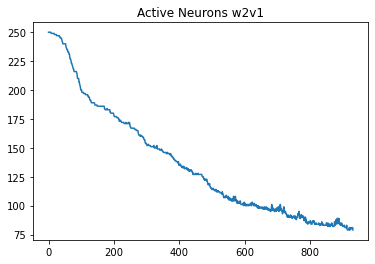

In [8]:
title = 'Active Neurons w2v1'
nacts_w2v1_binary=plot_nacts(w2v1_binary_results_PATH, title)

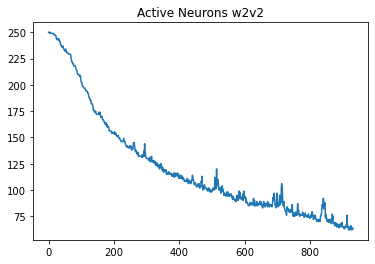

In [9]:
title = 'Active Neurons w2v2'
nacts_w2v2_binary=plot_nacts(w2v2_binary_results_PATH, title)

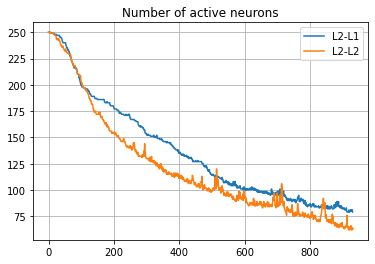

In [10]:
plt.plot(nacts_w2v1_binary[:-1])
plt.plot(nacts_w2v2_binary[:-1])
plt.legend(['L2-L1', 'L2-L2'])
plt.title('Number of active neurons')
plt.grid('on')
plt.show()

In [23]:
out_sparse_w2v1_binary = plot_out_sparsity(w2v1_binary_results_PATH, 'Out Sparse w2v1')
out_sparse_w2v2_binary = plot_out_sparsity(w2v2_binary_results_PATH, 'Out Sparse w2v2')

torch.Size([])


TypeError: iteration over a 0-d tensor

## Binary Experiments Flipped On-Hot

In these experiments we labelled the 1s as [0, 1] and 0s as [1, 0] to see if it changes the sparsity pattern of the output weights for each neuron

In [11]:
w2v1_binary_results_flip_PATH = 'results/MNIST_binary_shallow_NN/0701180720_pn_w2v1_loss_{0.0004}_{0.1}_balance/result.pt'
w2v1_binary_model_flip_PATH = 'results/MNIST_binary_shallow_NN/0701180720_pn_w2v1_loss_{0.0004}_{0.1}_balance/model_idx_10000_acc_0_24_sp_109.pt'

In [12]:
w2v1_binary_flip_out_weights = get_out_weights(w2v1_binary_results_flip_PATH, w2v1_binary_model_flip_PATH, 28, 1, 2, 250)
#w2v1_binary_out_weights[w2v1_binary_out_weights < 1e-4] = 0
print('Total Active Neurons: {}'.format(len(w2v1_binary_flip_out_weights)))
for weight in w2v1_binary_flip_out_weights:
    print(weight, '\n')

Total Active Neurons: 109
tensor([ 0.0000, -0.6355]) 

tensor([ 0.0000, -0.2481]) 

tensor([ 0.0000, -0.0169]) 

tensor([0.0000, 0.0464]) 

tensor([-0.0025,  0.0078]) 

tensor([ 0.0000, -0.8951]) 

tensor([ 0.0000, -0.1036]) 

tensor([ 0.0000, -0.4251]) 

tensor([0.0000, 0.6413]) 

tensor([ 0.0000, -1.0147]) 

tensor([-0.0633, -1.1984]) 

tensor([0.0000, 0.2577]) 

tensor([ 0.0000, -0.6360]) 

tensor([ 0.0000, -0.0902]) 

tensor([-0.1354, -1.4935]) 

tensor([ 0.0000, -0.8099]) 

tensor([-0.0261, -1.2566]) 

tensor([ 0.0000, -0.2012]) 

tensor([ 0.0000, -0.1916]) 

tensor([-0.0205, -1.0300]) 

tensor([0.4009, 1.7815]) 

tensor([0.0000, 0.6429]) 

tensor([0.1089, 1.1151]) 

tensor([ 0.0000, -0.6675]) 

tensor([ 0.0000, -0.5839]) 

tensor([-0.0107,  0.0246]) 

tensor([ 0.0000, -1.0442]) 

tensor([-0.0226,  0.0515]) 

tensor([0.0000, 0.0072]) 

tensor([ 0.0000, -0.1970]) 

tensor([0.0000, 0.0285]) 

tensor([ 0.0000, -0.4890]) 

tensor([ 0.0000, -0.4465]) 

tensor([-0.0185,  0.0419]) 

tens

In [16]:
w2v1_binary_results_flip_PATH = 'results/MNIST_binary_shallow_NN/0704132330_pn_w2v1_loss_{0.0003}_{0.1}_balance/result.pt'
w2v1_binary_model_flip_PATH = 'results/MNIST_binary_shallow_NN/0704132330_pn_w2v1_loss_{0.0003}_{0.1}_balance/model_idx_20000_acc_0_09_sp_21.pt'

In [17]:
w2v1_binary_flip_out_weights = get_out_weights(w2v1_binary_results_flip_PATH, w2v1_binary_model_flip_PATH, 28, 1, 2, 250)
#w2v1_binary_out_weights[w2v1_binary_out_weights < 1e-4] = 0
print('Total Active Neurons: {}'.format(len(w2v1_binary_flip_out_weights)))
for weight in w2v1_binary_flip_out_weights:
    print(weight, '\n')

Total Active Neurons: 15
tensor([ 0.0000, -0.1798]) 

tensor([-0.1610, -0.4715]) 

tensor([-0.0278,  0.1572]) 

tensor([-0.0489, -0.2870]) 

tensor([ 0.0000, -0.0417]) 

tensor([ 0.0000, -0.0817]) 

tensor([ 0.0000, -0.0059]) 

tensor([ 0.0600, -0.0185]) 

tensor([ 0.0002, -0.0001]) 

tensor([-0.0524, -0.3306]) 

tensor([ 0.0000, -0.0236]) 

tensor([ 0.1519, -0.0495]) 

tensor([ 0.0000, -0.0245]) 

tensor([ 0.0000, -0.0899]) 

tensor([ 0.0000, -0.0826]) 



## Regular (No flipping) $\lambda$=0.0003

In [18]:
w2v1_binary_results_PATH = 'results/MNIST_binary_shallow_NN/0704172811_pn_w2v1_loss_{0.0003}_{0.1}_balance/result.pt'
w2v1_binary_model_PATH = 'results/MNIST_binary_shallow_NN/0704172811_pn_w2v1_loss_{0.0003}_{0.1}_balance/model_idx_20000_acc_99_81_sp_87.pt'

In [23]:
w2v1_binary_out_weights = get_out_weights(w2v1_binary_results_PATH, w2v1_binary_model_PATH, 28, 1, 2, 250, thresh=0.0001)
#w2v1_binary_out_weights[w2v1_binary_out_weights < 1e-4] = 0
print('Total Active Neurons: {}'.format(len(w2v1_binary_out_weights)))
for weight in w2v1_binary_out_weights:
    print(weight, '\n')

Total Active Neurons: 41
tensor([-0.2155,  0.0000]) 

tensor([-0.0301,  0.0325]) 

tensor([-0.1197,  0.0000]) 

tensor([-0.1238,  0.1364]) 

tensor([0.5993, 0.0000]) 

tensor([-0.1071,  0.0000]) 

tensor([-0.0832,  0.0000]) 

tensor([-0.1852,  0.0000]) 

tensor([-0.0024,  0.0000]) 

tensor([1.5950, 0.3250]) 

tensor([ 0.0478, -0.0367]) 

tensor([-0.0930,  0.0000]) 

tensor([-0.1481,  0.0000]) 

tensor([ 0.0312, -0.0240]) 

tensor([0.1192, 0.0000]) 

tensor([0.0590, 0.0000]) 

tensor([ 0.0198, -0.0153]) 

tensor([0.1798, 0.0000]) 

tensor([3.7876, 1.3375]) 

tensor([1.7144, 0.4043]) 

tensor([ 0.0309, -0.0236]) 

tensor([0.3269, 0.0000]) 

tensor([-0.0370,  0.0000]) 

tensor([-0.1704,  0.0000]) 

tensor([0.3983, 0.0000]) 

tensor([0.4481, 0.0000]) 

tensor([-0.2774,  0.0000]) 

tensor([0.4613, 0.0000]) 

tensor([-0.0058,  0.0000]) 

tensor([-0.2576,  0.0000]) 

tensor([-0.2171,  0.0000]) 

tensor([0.4570, 0.0000]) 

tensor([0.4910, 0.0000]) 

tensor([0.0534, 0.0000]) 

tensor([-0.3905, 

## Subset MNIST Experiments

In [11]:
w2v1_results_PATH = 'results/MNIST_subset_shallow_NN/0620113547_pn_w2v1_loss_{0.001}_{0.1}_balance/result.pt'
w2v1_model_PATH = 'results/MNIST_subset_shallow_NN/0620113547_pn_w2v1_loss_{0.001}_{0.1}_balance/model_idx_5000_acc_84_7_sp_302.pt'
w2v1_out_weights = get_out_weights(w2v1_results_PATH, w2v1_model_PATH, 28, 1, 10, 1000)
w2v1_out_weights[w2v1_out_weights < 1e-4] = 0
for weight in w2v1_out_weights:
    print(weight, '\n')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1780, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.3914, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0042, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4193,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.4663]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1325, 0.0000,
        0.0000]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([0.0000, 0.2079, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1043, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0000, 0.

In [12]:
w2v2_results_PATH = 'results/MNIST_subset_shallow_NN/0620113548_pn_w2v2_loss_{0.001}_{0.1}_balance/result.pt'
w2v2_model_PATH = 'results/MNIST_subset_shallow_NN/0620113548_pn_w2v2_loss_{0.001}_{0.1}_balance/model_idx_5000_acc_87_34_sp_520.pt'
w2v2_out_weights = get_out_weights(w2v2_results_PATH, w2v2_model_PATH, 28, 1, 10, 1000)
w2v2_out_weights[w2v2_out_weights < 1e-4] = 0
for weight in w2v2_out_weights:
    print(weight, '\n')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1975]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0035, 0.0000, 0.0000, 0.0000, 0.0242,
        0.0097]) 

tensor([0.0000, 0.0000, 0.0000, 0.0723, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0013, 0.0014, 0.0010, 0.0002, 0.0000, 0.0000,
        0.0035]) 

tensor([0.0000, 0.0000, 0.0068, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0116]) 

tensor([0.0000, 0.0000, 0.0019, 0.0165, 0.0000, 0.0038, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0224, 0.0108, 0.0000, 0.0212, 0.0000, 0.0000, 0.0041, 0.0016, 0.0000,
        0.0422]) 

tensor([0.0013, 0.0019, 0.0064, 0.0000, 0.0159, 0.0000, 0.0009, 0.0000, 0.0000,
        0.0000]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.

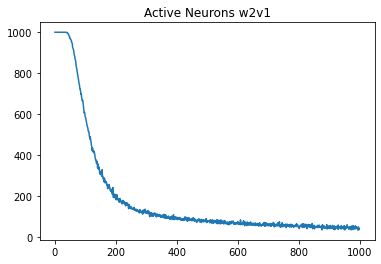

In [48]:
title = 'Active Neurons w2v1'
nacts_w2v1=plot_nacts(w2v1_results_PATH, title)

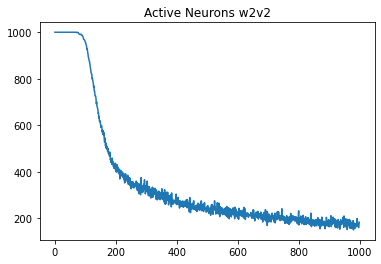

In [49]:
title = 'Active Neurons w2v2'
nacts_w2v2=plot_nacts(w2v2_results_PATH, title)

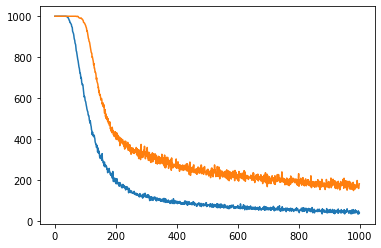

In [52]:
plt.plot(nacts_w2v1[:-1])
plt.plot(nacts_w2v2[:-1])
plt.show()

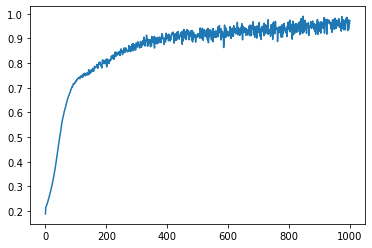

In [64]:
out_sparse_w2v1 = plot_out_sparsity(w2v1_results_PATH, 'Out Sparse w2v1')

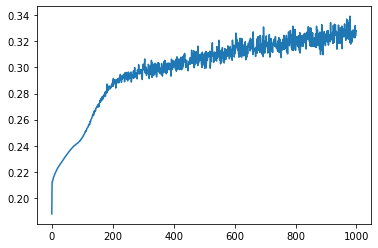

In [65]:
out_sparse_w2v2 = plot_out_sparsity(w2v2_results_PATH, 'Out Sparse w2v2')

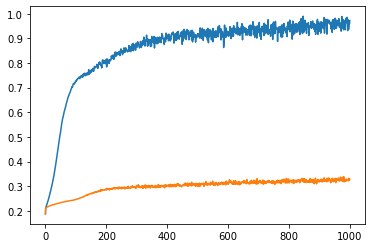

In [67]:
plt.plot(out_sparse_w2v1[:-1])
plt.plot(out_sparse_w2v2[:-1])
plt.show()

In [15]:
w2v1_results_5000_PATH = 'results/MNIST_subset_shallow_NN/0628202106_pn_w2v1_loss_{0.0005}_{0.1}_balance/result.pt'
w2v1_model_5000_PATH = 'results/MNIST_subset_shallow_NN/0628202106_pn_w2v1_loss_{0.0005}_{0.1}_balance/model_idx_85800_acc_74_99_sp_308.pt'
w2v1_out_weights = get_out_weights(w2v1_results_5000_PATH, w2v1_model_5000_PATH, 28, 1, 10, 5000)
w2v1_out_weights[w2v1_out_weights < 1e-5] = 0
print('Total Number of neurons is: {}'.format(len(w2v1_out_weights)))
for weight in w2v1_out_weights:
    print(weight, '\n')

Total Number of neurons is: 308
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        2.1432]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.3905]) 

tensor([7.2525, 3.3369, 0.0000, 1.5702, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  6.1265,  0.0000, 25.9019,
         4.5754, 75.7200]) 

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  6.0503,
         0.0000, 23.2843]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        4.1248]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.7705]) 

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  4.8618,
         0.0000, 20.1153]) 

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0788,
         0.0000